### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

In [1]:
import sys
import pandas as pd
import numpy as np
import sympy
from mpl_toolkits import mplot3d
import scipy.optimize as opt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [ ]:
Location = r'/Users/macbook/Downloads/2008.csv'
df = pd.read_csv(Location)
#Сортирую авиаперевозчиков
ranking = df['UniqueCarrier'].value_counts().head(10)
ranking

**Задание 2:** Построить распределение причин отмены рейсов

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

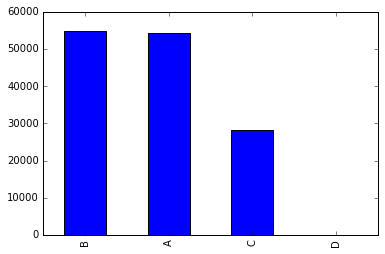

In [3]:
Cancellation_reason = df['CancellationCode'].value_counts()
Cancellation_reason.plot.bar()
Cancellation_reason

In [4]:
df['CancellationCode'].describe()

count     137434
unique         4
top            B
freq       54904
Name: CancellationCode, dtype: object

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [6]:
flights = df.groupby(['Origin','Dest'])
flights_1 = flights.size().sort_values(ascending = False)
flights_1.head(1)

Origin  Dest
SFO     LAX     13788
dtype: int64

In [7]:
flights.get_group(('SFO','LAX')).describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


# **Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [8]:
### По каждому рейсу считаю суммарное время задержек по причине 'CarrierDelay', далее сортирую посчитанные суммы в
#убывающем порядке и отображаю топ-5 рейсов.
carrier_delay = df.groupby('FlightNum')['CarrierDelay'].sum().sort_values(ascending = False).iloc[:5] 
carrier_delay

FlightNum
73     22176
12     22097
36     20300
21     19367
283    19328
Name: CarrierDelay, dtype: float64

In [9]:
#функция, которая принимает в качестве input номер рейса, в качестве output выводит всех авиперевозчиков, которым
#принадлежит данный рейс.
def list_carriers(a):
    print(df[df['FlightNum'] == a]['UniqueCarrier'].unique())
print('Рейс 73 принадлежит следующим перевозчикам:')
list_carriers(73)
print('Рейс 12 принадлежит следующим перевозчикам:')
list_carriers(12)
print('Рейс 36 принадлежит следующим перевозчикам:')
list_carriers(36)
print('Рейс 21 принадлежит следующим перевозчикам:')
list_carriers(21)
print('Рейс 283 принадлежит следующим перевозчикам:')
list_carriers(283)

Рейс 73 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'DL' 'FL' 'AA' 'AQ' 'AS' 'B6' 'CO']
Рейс 12 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AS' 'B6' 'CO' 'FL']
Рейс 36 принадлежит следующим перевозчикам:
['WN' 'UA' 'DL' 'HA' 'B6' 'CO' 'FL' 'AS']
Рейс 21 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'FL' 'HA' 'AA' 'AS' 'B6']
Рейс 283 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'F9' 'NW' 'AA' 'AS' 'FL' 'CO' 'B6']


In [10]:
### По каждому рейсу считаю суммарное время задержек по причине 'CarrierDelay', далее сортирую посчитанные суммы в
#убывающем порядке и отображаю топ-5 рейсов.
weather_delay = df.groupby('FlightNum')['WeatherDelay'].sum().sort_values(ascending = False).iloc[:5] 
weather_delay

FlightNum
539     11177
5685     6132
5257     5987
648      5242
653      4862
Name: WeatherDelay, dtype: float64

In [11]:
print('Рейс 539 принадлежит следующим перевозчикам:')
list_carriers(539)
print('Рейс 5685 принадлежит следующим перевозчикам:')
list_carriers(5685)
print('Рейс 5257 принадлежит следующим перевозчикам:')
list_carriers(5257)
print('Рейс 648 принадлежит следующим перевозчикам:')
list_carriers(648)
print('Рейс 653 принадлежит следующим перевозчикам:')
list_carriers(653)

Рейс 539 принадлежит следующим перевозчикам:
['WN' 'UA' 'DL' 'F9' 'FL' 'NW' 'AA' 'AS' 'CO']
Рейс 5685 принадлежит следующим перевозчикам:
['OH' '9E' 'EV']
Рейс 5257 принадлежит следующим перевозчикам:
['OH' 'EV']
Рейс 648 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'B6' 'CO' 'AS']
Рейс 653 принадлежит следующим перевозчикам:
['WN' 'UA' 'F9' 'NW' 'US' 'DL' 'AA' 'AS' 'FL']


In [12]:
### По каждому рейсу считаю суммарное время задержек по причине 'CarrierDelay', далее сортирую посчитанные суммы в
#убывающем порядке и отображаю топ-5 рейсов.
nas_delay = df.groupby('FlightNum')['NASDelay'].sum().sort_values(ascending = False).iloc[:5] 
nas_delay

FlightNum
378    29875
524    28593
7      26591
16     26322
75     26267
Name: NASDelay, dtype: float64

In [13]:
print('Рейс 378 принадлежит следующим перевозчикам:')
list_carriers(378)
print('Рейс 524 принадлежит следующим перевозчикам:')
list_carriers(524)
print('Рейс 7 принадлежит следующим перевозчикам:')
list_carriers(7)
print('Рейс 16 принадлежит следующим перевозчикам:')
list_carriers(16)
print('Рейс 15 принадлежит следующим перевозчикам:')
list_carriers(15)

Рейс 378 принадлежит следующим перевозчикам:
['WN' 'UA' 'F9' 'FL' 'HA' 'NW' 'AA' 'AS' 'B6' 'CO' 'US']
Рейс 524 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'AS' 'B6' 'CO' 'HA']
Рейс 7 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'HA' 'AA' 'AS' 'B6' 'CO' 'DL' 'FL']
Рейс 16 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'FL']
Рейс 15 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'US' 'FL']


In [14]:
### По каждому рейсу считаю суммарное время задержек по причине 'CarrierDelay', далее сортирую посчитанные суммы в
#убывающем порядке и отображаю топ-5 рейсов.
security_delay = df.groupby('FlightNum')['SecurityDelay'].sum().sort_values(ascending = False).iloc[:5] 
security_delay

FlightNum
52      780
1256    597
2877    489
467     440
167     438
Name: SecurityDelay, dtype: float64

In [15]:
print('Рейс 52 принадлежит следующим перевозчикам:')
list_carriers(52)
print('Рейс 1256 принадлежит следующим перевозчикам:')
list_carriers(1256)
print('Рейс 2877 принадлежит следующим перевозчикам:')
list_carriers(2877)
print('Рейс 467 принадлежит следующим перевозчикам:')
list_carriers(467)
print('Рейс 167 принадлежит следующим перевозчикам:')
list_carriers(167)

Рейс 52 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'FL' 'B6' 'CO' 'AS' 'DL']
Рейс 1256 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'NW' 'AA' 'B6' 'DL' 'XE']
Рейс 2877 принадлежит следующим перевозчикам:
['WN' 'XE' 'YV' '9E' 'OO']
Рейс 467 принадлежит следующим перевозчикам:
['WN' 'UA' 'DL' 'NW' 'AQ' 'AS' 'B6' 'CO' 'FL' 'AA' 'US']
Рейс 167 принадлежит следующим перевозчикам:
['WN' 'UA' 'F9' 'FL' 'HA' 'CO' 'B6' 'DL' 'AS']


In [16]:
### По каждому рейсу считаю суммарное время задержек по причине 'CarrierDelay', далее сортирую посчитанные суммы в
#убывающем порядке и отображаю топ-5 рейсов.
late_aircraft_delay = df.groupby('FlightNum')['LateAircraftDelay'].sum().sort_values(ascending = False).iloc[:5] 
late_aircraft_delay

FlightNum
52     38157
29     34109
527    34042
547    33443
50     33431
Name: LateAircraftDelay, dtype: float64

In [17]:
print('Рейс 52 принадлежит следующим перевозчикам:')
list_carriers(52)
print('Рейс 29 принадлежит следующим перевозчикам:')
list_carriers(29)
print('Рейс 527 принадлежит следующим перевозчикам:')
list_carriers(527)
print('Рейс 547 принадлежит следующим перевозчикам:')
list_carriers(547)
print('Рейс 50 принадлежит следующим перевозчикам:')
list_carriers(50)

Рейс 52 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'FL' 'B6' 'CO' 'AS' 'DL']
Рейс 29 принадлежит следующим перевозчикам:
['WN' 'UA' 'US' 'FL' 'HA' 'AS' 'B6']
Рейс 527 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'B6' 'CO' 'AS']
Рейс 547 принадлежит следующим перевозчикам:
['WN' 'DL' 'FL' 'NW' 'AA' 'AS' 'B6' 'CO' 'UA']
Рейс 50 принадлежит следующим перевозчикам:
['WN' 'XE' 'UA' 'US' 'DL' 'B6' 'CO' 'FL']


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125d57390>]], dtype=object)

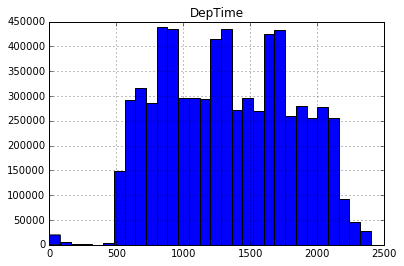

In [18]:
df.hist('DepTime', bins=30)

In [19]:
df['DepTime'].describe()

count    6873482.000000
mean        1333.830046
std          478.068895
min            1.000000
25%          928.000000
50%         1325.000000
75%         1728.000000
max         2400.000000
Name: DepTime, dtype: float64

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

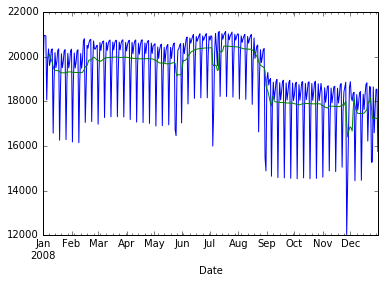

In [20]:
df['Date'] = pd.to_datetime(df.Year*10000 + 
                                    df.Month*100 + 
                                    df.DayofMonth, 
                            format='%Y%m%d')
num_flights_by_date = df.groupby('Date')['FlightNum'].agg('count')
num_flights_by_date.plot()
#Скользящее среднее
pd.rolling_mean(num_flights_by_date, 7).plot()

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [4]:
Location1 = r'/Users/macbook/Downloads/FBI-Hate-Crime-Statistics-master/2013/table13.csv'
Location2 = r'/Users/macbook/Downloads/FBI-Hate-Crime-Statistics-master/2013/table14.csv'
table13 = pd.read_csv(Location1)
table14 = pd.read_csv(Location2)
#Создаю лист из уникальных значений штатов в таблице 13
x = list(table13['State'].unique())
#Создаю лист из уникальных значений штатов в таблице 14
y = list(table14['State'].unique())
#Создаю dataframe из уникальных значений штатов в таблице 13
df_13 = pd.DataFrame({'A':list(table13['State'].unique())})
#Создаю dataframe из уникальных значений штатов в таблице 14
df_14 = pd.DataFrame({'A':list(table14['State'].unique())})

In [156]:
#dataframe, в котором в i-ой строке стоит True, если i-ый штат из df_13 содержится в df_14.
df_13_is_in_df_14 = pd.DataFrame(df_13.isin(list(table14['State'].unique())))
#функция, которая принтит 'YES', если все значения df_13 содержатся в df_14, и 'NO' в противном случае.
def function(x):
 indicator = 0 
 for i in x.itertuples():
    if i[1]==True:
        indicator += 1
    elif i[1]==False:
        print('NO')
        break
 if indicator == len(x):
    print('YES')
function(df_13_is_in_df_14)
#на всякий случай непосредственно отобразим df_13_is_in_df_14
df_13_is_in_df_14

NO


,A
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,False
8,True
9,True


In [157]:
#dataframe, в котором в i-ой строке стоит True, если i-ый штат из df_14 содержится в df_13.
df_14_is_in_df_13 = pd.DataFrame(df_14.isin(list(table13['State'].unique())))
function(df_14_is_in_df_13)
#на всякий случай непосредственно отобразим df_13_is_in_df_14
df_14_is_in_df_13

YES


,A
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [ ]:
#Ответ: в table14 содержатся все штаты из table14, но обратное неверно.

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [62]:
pd.concat([table13, table14], axis = 0)

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency name,Agency type,Disability,Ethnicity,Gender,Gender Identity,Population,Race,Religion,Sexual orientation,State
0,0,1,0,1,Florence,Cities,0,0,0,0,"39,481",2,0,0,Alabama
1,0,1,0,0,Hoover,Cities,0,0,0,0,"84,139",0,0,1,Alabama
2,1,0,1,0,Prattville,Cities,0,0,0,0,"35,154",2,0,0,Alabama
3,0,0,1,0,Tuscaloosa,Cities,0,0,0,0,"94,126",1,0,0,Alabama
4,2,3,3,0,Anchorage,Cities,0,0,0,0,"299,455",8,0,0,Alaska
5,1,0,0,NaN,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,Arizona
6,1,1,3,0,Avondale,Cities,0,1,0,0,"78,905",4,0,0,Arizona
7,0,1,0,0,Eagar,Cities,0,1,0,0,"5,034",0,0,0,Arizona
8,0,0,1,0,El Mirage,Cities,0,0,0,0,"32,837",1,0,0,Arizona
9,1,0,0,0,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,Arizona


In [65]:
#Совмещаю таблицы друг под другом
mixed_table = table13.append(table14, ignore_index=True)
mixed_table

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency name,Agency type,Disability,Ethnicity,Gender,Gender Identity,Population,Race,Religion,Sexual orientation,State
0,0,1,0,1,Florence,Cities,0,0,0,0,"39,481",2,0,0,Alabama
1,0,1,0,0,Hoover,Cities,0,0,0,0,"84,139",0,0,1,Alabama
2,1,0,1,0,Prattville,Cities,0,0,0,0,"35,154",2,0,0,Alabama
3,0,0,1,0,Tuscaloosa,Cities,0,0,0,0,"94,126",1,0,0,Alabama
4,2,3,3,0,Anchorage,Cities,0,0,0,0,"299,455",8,0,0,Alaska
5,1,0,0,NaN,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,Arizona
6,1,1,3,0,Avondale,Cities,0,1,0,0,"78,905",4,0,0,Arizona
7,0,1,0,0,Eagar,Cities,0,1,0,0,"5,034",0,0,0,Arizona
8,0,0,1,0,El Mirage,Cities,0,0,0,0,"32,837",1,0,0,Arizona
9,1,0,0,0,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [10]:
mixed_table.dropna()

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


In [ ]:
#У таблиц есть разные столбцы (некоторые из которых, по сути, лишь называются по-разному), поэтому, например, в таблице
#table14 в графе 'Race' стоит Nan. Поэтому в любом row есть Nan, и именно поэтому все элементы были удалены.

In [9]:
#Переименуем некоторые столбцы table14 так, чтобы они имели такое же название, как и некоторые столбцы из 
#table13 (данные столбцы содержат информацию одинакового типа)
table14 = table14.rename(columns={'Q1': '1st quarter', 'Q2': '2nd quarter', 'Q3': '3rd quarter', 'Q4': '4th quarter',
                                  'Agency Type': 'Agency type', 'Agency Name': 'Agency name'})
#Для удобства также добавим к table14 недостающие столбцы, и заполним их нулями.
table14['Race'] = np.array([0]*table14.shape[0])
table14['Religion'] = np.array([0]*table14.shape[0])
table14['Sexual orientation'] = np.array([0]*table14.shape[0])
table14['Ethnicity'] = np.array([0]*table14.shape[0])
table14['Disability'] = np.array([0]*table14.shape[0])
table14['Gender'] = np.array([0]*table14.shape[0])
table14['Gender Identity'] = np.array([0]*table14.shape[0])

In [66]:
mixed_table = table13.append(table14, ignore_index=True)
#Удаляем строки с Nan
refined_table = mixed_table.dropna()
refined_table

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency name,Agency type,Disability,Ethnicity,Gender,Gender Identity,Population,Race,Religion,Sexual orientation,State
0,0,1,0,1,Florence,Cities,0,0,0,0,"39,481",2,0,0,Alabama
1,0,1,0,0,Hoover,Cities,0,0,0,0,"84,139",0,0,1,Alabama
2,1,0,1,0,Prattville,Cities,0,0,0,0,"35,154",2,0,0,Alabama
3,0,0,1,0,Tuscaloosa,Cities,0,0,0,0,"94,126",1,0,0,Alabama
4,2,3,3,0,Anchorage,Cities,0,0,0,0,"299,455",8,0,0,Alaska
6,1,1,3,0,Avondale,Cities,0,1,0,0,"78,905",4,0,0,Arizona
7,0,1,0,0,Eagar,Cities,0,1,0,0,"5,034",0,0,0,Arizona
8,0,0,1,0,El Mirage,Cities,0,0,0,0,"32,837",1,0,0,Arizona
9,1,0,0,0,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,Arizona
10,2,0,3,2,Glendale,Cities,0,1,0,0,"234,006",2,3,1,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [67]:
#Индексируем таблицу по переменным State и Agency type
indexed_df = refined_table.set_index(['State', 'Agency type'])
indexed_df

1st quarter  2nd quarter  3rd quarter  \
State    Agency type                                                        
Alabama  Cities                               0            1            0   
         Cities                               0            1            0   
         Cities                               1            0            1   
         Cities                               0            0            1   
Alaska   Cities                               2            3            3   
Arizona  Cities                               1            1            3   
         Cities                               0            1            0   
         Cities                               0            0            1   
         Cities                               1            0            0   
         Cities                               2            0            3   
         Cities                               0            0            0   
         Cities                               2            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               2            0            1   
         Cities                               8            8            6   
         Cities                               3            5            0   
         Universities and Colleges            0            0            0   
         Universities and Colleges            2            0            0   
Arkansas Cities                               0            0            1   
         Cities                               0            0            1   
         Cities                               0            0            1   
         Cities                               0            1            0   
         Cities                               0            0            1   
         Cities                               0            0            0   
         Cities                               1            0            0   
         Cities                               0            0            1   
         Cities                               0            1            0   
         Cities                               1            0            0   
         Cities                               0            1            0   
...                                         ...          ...          ...   
Wyoming  Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                               0            0            0   
         Cities                 

In [68]:
#Индексируем таблицу по переменным State и Agency type
pd.pivot_table(refined_table,index=["State", 'Agency type'])

1st quarter  2nd quarter  \
State          Agency type                                           
Alabama        Cities                        0.025641     0.051282   
               Universities and Colleges     0.000000     0.000000   
Alaska         Cities                        0.071429     0.107143   
               Universities and Colleges     0.000000     0.000000   
Arizona        Cities                        0.358491     0.283019   
               Universities and Colleges     0.400000     0.000000   
Arkansas       Cities                        0.017341     0.017341   
               Universities and Colleges     0.000000     0.000000   
California     Cities                        0.354978     0.389610   
               Universities and Colleges     0.224490     0.183673   
Colorado       Cities                        0.147887     0.211268   
               Universities and Colleges     0.000000     0.000000   
Connecticut    Cities                        0.371795     0.410256   
               Universities and Colleges     0.250000     0.250000   
DC             Cities                       19.000000    21.000000   
Delaware       Cities                        0.052632     0.052632   
               Universities and Colleges     0.000000     0.500000   
Florida        Cities                        0.057239     0.050505   
               Universities and Colleges     0.000000     0.000000   
Georgia        Cities                        0.043062     0.052632   
               Universities and Colleges     0.054054     0.000000   
Idaho          Cities                        0.095238     0.047619   
Illinois       Cities                        0.032882     0.048356   
               Universities and Colleges     0.032258     0.032258   
Indiana        Cities                        0.236842     0.552632   
               Universities and Colleges     0.000000     0.333333   
Iowa           Cities                        0.000000     0.008475   
               Universities and Colleges     0.000000     0.333333   
Kansas         Cities                        0.046875     0.098958   
               Universities and Colleges     0.000000     0.000000   
...                                               ...          ...   
Oklahoma       Universities and Colleges     0.000000     0.000000   
Oregon         Cities                        0.304348     0.347826   
Pennsylvania   Cities                        0.008783     0.022585   
               Universities and Colleges     1.000000     0.333333   
Rhode_Island   Cities                        0.052632     0.026316   
               Universities and Colleges     0.000000     0.000000   
South_Carolina Cities                        0.056604     0.062893   
               Universities and Colleges     0.045455     0.000000   
South_Dakota   Cities                        0.050847     0.000000   
               Universities and Colleges     0.000000     0.000000   
Tennessee      Cities                        0.077519     0.100775   
               Universities and Colleges     0.055556     0.111111   
Texas          Cities                        0.053016     0.047532   
               Universities and Colleges     0.049180     0.016393   
Utah           Cities                        0.109589     0.232877   
               Universities and Colleges     0.166667     0.000000   
Vermont        Cities                        0.000000     0.057692   
               Universities and Colleges     0.000000     0.000000   
Virginia       Cities                        0.060403     0.114094   
               Universities and Colleges     0.120000     0.040000   
Washington     Cities                        0.268817     0.327957   
               Universites and Colleges      0.000000     0.000000   
               Universities and Colleges     0.250000     0.750000   
West_Virginia  Cities                        0.057143     0.200000   
               Universites and Colleges      0.00000

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [69]:
final_table = refined_table.loc[refined_table['State'].isin(['Colorado', 'California', 'Alaska'])]
for i, stat in list(final_table.groupby(['State', 'Agency type'])):
    print(*i, stat['Population'].sum())

Alaska Cities 299,4556,4639852,2731,2632,43832,5052,5615,30932,9467,4228,3056,5643,3753,8052,2369,6746,4532,9812,7499,0939564,4184,3404,0328,6452202,414
Alaska Universities and Colleges 17,4979,223
California Cities 31,16520,76276,20684,710106,44757,85528,93828,90613,77947,754361,85976,74530,503116,21734,78054,30182,632104,72724,11466,17340,549110,50593,41549,81688,22680,704255,07385,33735,62314,95199,48353,40397,907125,46423,290160,15923,183112,53848,52460,44049,067104,53634,26266,12621,759102,01224,184160,925115,59110,41561,433148,65026,881108,425203,42732,652508,876139,67624,553175,46951,240195,36650,8936,56354,42514,437150,95511,48324,8316,022195,84226,998235,83098,09023,31361,74056,23279,33681,08649,150159,79239,15026,15624,80284,35063,63920,622469,66511,7353,878,72530,35171,07712,89135,93072,26169,522204,25237,78529,338201,28439,907107,76859,63743,95087,639106,518403,887172,525168,144140,30415,581202,59438,49415,518156,52246,28266,96454,868139,00363,71018,84852,00267,63442,54214,

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [5]:
import sympy as sym
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
Location_honda = r'/Users/macbook/Downloads/accord_sedan_training.csv'
honda_features = pd.read_csv(Location_honda)
#Для удобства добавим единичный столбец к дата фрейму
honda_features['one'] = pd.DataFrame(1 for i in range(len(honda_features)))
#Создаем матрицу, состоящую из единичного столбца и столбца по 'mileage'
X = np.array([honda_features['one'], honda_features['mileage']]).T
#Создаем вектор по ценам
y = np.array(honda_features['price'])

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

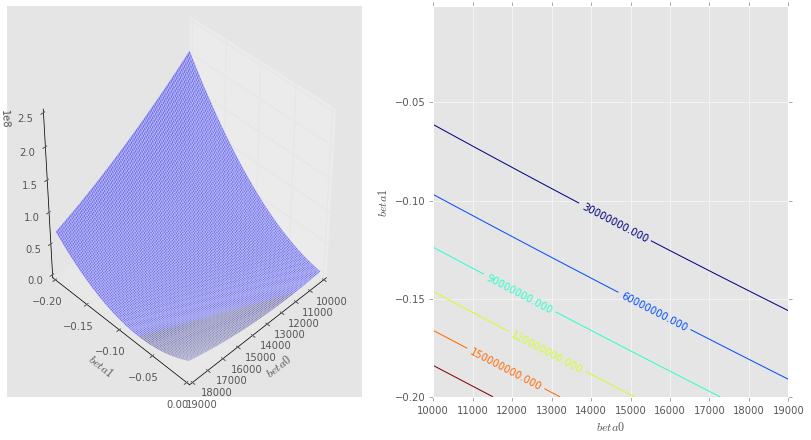

In [153]:
from sympy import *
#Будем делать через символьное вычисление
beta0 = symbols('beta0')
beta1 = symbols('beta1')
#Вектор, показывающий разницу между истинным значением цены и предполагаемым исходя из регрессии
difference = np.dot(X, np.array([beta0, beta1]))-y
#Возведем каждый элемент в квадрат и просуммируем по всем элементам, поделив на 2*количество строк в матрице X.
#т.е находим значение функции потерь
for i in range(difference.shape[0]):
    difference[i] = difference[i]**2
quadr_error = np.sum(difference/(2*difference.shape[0]))
#Задаем диапазон значений для beta0 и beta1 соответственно
a = np.linspace(19000, 10000, 1000)
b = np.linspace(-0.2, -0.001, 1000)
#Создаем матрицу совместных значений beta0 и beta1.
BETA0, BETA1 = np.meshgrid(a, b)
#Для численной оценки значения функции quadr_error используем функцию lambdify 
f = sym.lambdify([beta0, beta1], quadr_error)
#Аргументы функции берем из таблицы совместных значений beta0 и beta1.
quadr_error1 = f(BETA0, BETA1)
#Задаем параметры для графиков.
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 40)
ax.azim = 45
ax.plot_surface(BETA0, BETA1, quadr_error1, alpha=0.5,)
# ax.plot_(X, Y, Z)
ax.set_xlabel('$beta0$')
ax.set_ylabel('$beta1$')
ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(BETA0, BETA1, quadr_error1)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('$beta0$')
ax.set_ylabel('$beta1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [70]:
import numpy as np
import random
# Зададим функцию: A и b - это матрица и вектор соответственно, beta - вектор [beta0, beta1], alpha - коэффициент
#скорости спуска, m - количество строк в матрице A (явно задаем), numIterations - количество итераций
def gradientDescent(A, b, beta, alpha, m, numIterations):
    for i in range(0, numIterations):
        #Произведение A на beta, дающее оценку для b
        hypothesis = np.dot(A, beta)
        #Разница между оценкой и истинным значением
        loss = hypothesis - y
        #Возведем каждый элемент в квадрат и просуммируем по всем элементам, поделив на 2*количество строк в матрице A.
        #т.е находим значение функции потерь
        cost = np.sum(loss ** 2) / (2 * m)
        #Выражение для градиента 
        gradient = np.dot(A.T, loss) / m
        #Обновляем градиент
        beta = theta - alpha * gradient
    return beta

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [151]:
#Находим значения коэффициентов
coefficients = gradientDescent(X,y,np.array([19000,-0.08]),0.00000000000001,417,10000).T
coefficients

array([  1.90000000e+04,  -7.71798158e-02])

In [ ]:
#Коэффициент beta1 показывает, насколько сократится цена при увеличении пробега на 1 единицу.
#Коэффициент beta0 показывает, сколько по идее должен стоить автомобиль с нулевым пробегом.

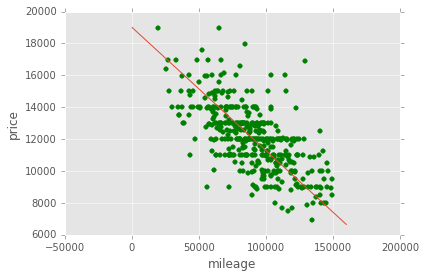

In [152]:
#Строим scatter - диаграмму для реальных значений цены и пробега
plt.scatter(honda_features['mileage'], y, color='Green')
plt.xlabel('mileage')
plt.ylabel('price')
#Задаем функцию для регрессионной прямой
x = symbols('x')
a = np.dot(np.array([1, x]), coefficients)
a1 = lambdify(x, a, 'numpy')
function = a1(np.linspace(0,160000,2))
plt.plot(np.linspace(100,160000,2), function)